# **Inteligencia Artificial 2022**

### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Load data

In [3]:
iris = load_iris()
X = iris['data']
y = iris['target']

In [4]:
colors = {0:'red', 1:'blue', 2:'green'}
c = []
for i in range(0, len(y)):
    c.append(colors[y[i]])

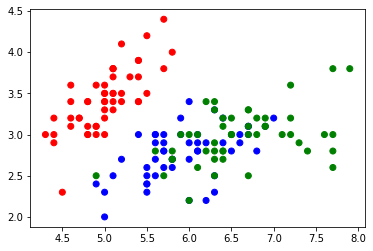

In [5]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=c)
plt.show()

In [6]:
# separamos en clases 0, 1, 2
y0 = np.argwhere(y==0)
y1 = np.argwhere(y==1)
y2 = np.argwhere(y==2)

X0 = X[y0]
X1 = X[y1]
X2 = X[y2]

# extract class 0 and 2
X01 = np.vstack([X0,X2]).reshape(-1,4)
y01 = np.stack(np.array(50*[0] + 50*[1]))

# extract class 1 and 2
X12 = np.vstack([X1,X2]).reshape(-1,4)
y12 = np.stack(np.array(50*[1] + 50*[2]))

In [7]:
print(X01.shape, y01.shape)
print(X12.shape, y12.shape)

(100, 4) (100,)
(100, 4) (100,)


## Clasificador logístico

In [8]:
def sigmoid(X, w):
    ''' Computes sigmoid function.
        Inputs:  X = data, as numpy array of shape (n,d+1).
                 w = vector of coeficients, as numpy array of shape (d+1,).
        Outputs: y = sigmoid function evaluated on each entry.
    '''
    return 1./(1. + np.exp(-X@w))


def fit(X, y, w0, alpha, maxIter=1000, eps=1e-3):
    ''' Iteración del clasificador logístico por descenso gradiente.
        Inputs:  X  = data, as numpy array of shape (n,d).
                 y  = vector of class labels (0 and 1) ad numpy arryas of shape (n,). 
                 w0 = initial vector of coeficients.
                 alpha = step size.
                 maxIter = max numer of iterations in gradient descent.
                 eps = convergence tolerance.
        Outputs: w     = optimal vector of coefficients.
                 conv  = convergence flag (1 = method converged; 0 = not).
                 error = error after last step.
                 i     = number of total iterations. 
    '''
    n = X.shape[0]
    d = X.shape[1]

    # Add 1 dimension for the bias term
    X = np.concatenate([np.ones((n,1)), X], axis=1)

    # init data
    w = w0.copy()
    error = 10.*eps
    i = 0
    conv = 0

    # main iteration
    while ((i <= maxIter) and (error > eps)):
        wold = w.copy()
        diff = alpha*(y - sigmoid(X, w))
        for j in range(0, n):
            w += diff[j]*X[j,:]
        error = (np.abs(w - wold)).sum()
        if (error < eps): conv = 1
        i = i+1
    return w, conv, error, i

    
def predict(X, w):
    ''' Predicts labels on a dataset, by using optimal weights.
        Inputs:  X = data, as numpy array of shape (n,d),
                 w  = optimal vector (after fit), of shape (d+1,).
        Outputs: y    = real valuated predictions by logistic regression,
                 yhat = binary predictions (1 = if y > 0.5, 0 otherwise). 
    '''
    n = X.shape[0]
    # Add column of 1s
    X = np.concatenate([np.ones((n,1)), X], axis=1)
    y = sigmoid(X, w)                  # real labels in (0,1)
    yhat = (y > 0.5).astype(np.uint8)  # binary labels
    return y, yhat

### Experimento 1: Clase 0 y 1 (linealmente separable)

In [9]:
alpha   = 1e-3
maxIter = 5000
eps     = 1e-3
#w0 = np.zeros(3)
w0 = np.random.rand(3,)

In [10]:
# Training (gradient descent)

w, conv, err, it = fit(X01[:,[0,1]], y01, w0, alpha, maxIter, eps)
print(w, conv, err, it)

[-2.02891783  4.57017056 -7.51868268] 1 0.0009999583416133717 4290


In [12]:
yprob, yhat = predict(X01[:,[0,1]], w)
print(yprob)
print(yhat)

[6.45491632e-03 1.00549837e-01 9.86448585e-03 1.32026180e-02
 1.93575020e-03 1.26317958e-03 1.40031833e-03 8.64933256e-03
 2.35603632e-02 5.00684710e-02 5.65736987e-03 3.48561082e-03
 6.61032974e-02 7.15166669e-03 3.69652274e-03 1.16075985e-04
 1.26317958e-03 6.45491632e-03 1.04573286e-02 6.80472677e-04
 5.14893541e-02 1.44215449e-03 3.11627310e-04 2.83959774e-02
 3.48561082e-03 1.50062226e-01 8.64933256e-03 1.01566270e-02
 2.12992919e-02 9.86448585e-03 3.22949811e-02 5.14893541e-02
 1.12704338e-04 2.09317907e-04 5.00684710e-02 3.77659567e-02
 3.88519885e-02 1.22652901e-03 1.12484202e-02 1.35922623e-02
 4.09675695e-03 7.76238576e-01 2.52256832e-03 4.09675695e-03
 6.80472677e-04 6.61032974e-02 6.80472677e-04 6.26857540e-03
 3.58952360e-03 1.81687226e-02 8.75610526e-01 9.84896769e-01
 9.99615524e-01 9.93028832e-01 9.94066222e-01 9.99960860e-01
 8.27528450e-01 9.99927304e-01 9.99944247e-01 9.78311639e-01
 9.73849952e-01 9.99012879e-01 9.98487071e-01 9.94644960e-01
 9.68499968e-01 9.593161

In [13]:
cfmatrix = confusion_matrix(y01, yhat)
print(cfmatrix)

[[49  1]
 [ 0 50]]


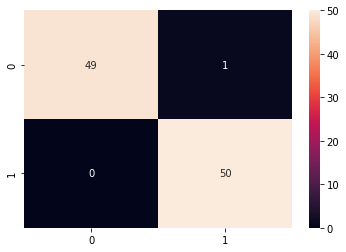

In [14]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [15]:
print(classification_report(y01, yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## Regiones de clasificación

In [16]:
# Plotting decision regions
h = 0.01
x_min, x_max = X01[:,0].min() - 1, X01[:,0].max() + 1
y_min, y_max = X01[:,1].min() - 1, X01[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

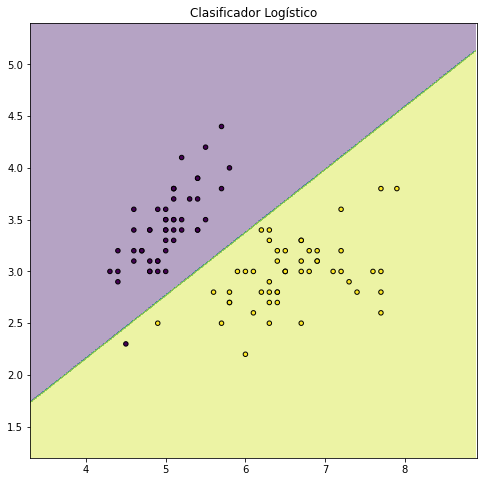

In [17]:
plt.figure(figsize=(8,8))
Zp, Z = predict(np.c_[xx.ravel(), yy.ravel()], w)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X01[:,0], X01[:,1], c=y01, s=20, edgecolor='k')
plt.title('Clasificador Logístico')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

### Experimento 2: Clase 1 y 2 (no separable)

In [18]:
alpha   = 1e-3
maxIter = 5000
eps     = 1e-3
#w0 = np.zeros(3)
w0 = np.random.rand(3,)

In [19]:
# Training (gradient descent)

w, conv, err, it = fit(X12[:,[0,1]], y01, w0, alpha, maxIter, eps)
print(w, conv, err, it)

[-6.86843517  1.22914412 -0.27181115] 0 0.0010015073360571947 5001


In [20]:
yprob, yhat = predict(X12[:,[0,1]], w)
print(yprob)
print(yhat)

[0.70386642 0.53202896 0.68353056 0.32446919 0.58902358 0.349012
 0.49454921 0.18272763 0.61198498 0.2295638  0.21988496 0.39366835
 0.47712723 0.46035629 0.3157267  0.62813304 0.30988402 0.38383798
 0.53849214 0.33967206 0.38077016 0.46711572 0.5487558  0.46711572
 0.55226707 0.60551126 0.67451414 0.63445964 0.43000695 0.36146236
 0.31854005 0.31854005 0.38383798 0.44337877 0.25989961 0.39706046
 0.62813304 0.56217825 0.30988402 0.3126691  0.30685763 0.45361141
 0.39028646 0.20621714 0.32758719 0.3367643  0.34286199 0.49100248
 0.21766463 0.349012   0.49454921 0.38383798 0.73943897 0.52171644
 0.57580313 0.83991915 0.1787034  0.78852621 0.6653666  0.7316249
 0.5624733  0.56566775 0.66246788 0.36775929 0.3774301  0.53202896
 0.57580313 0.82679661 0.86867177 0.47712723 0.67762172 0.32162819
 0.86234482 0.53526203 0.61534911 0.75242855 0.4977968  0.45361141
 0.55897815 0.76241563 0.81247304 0.85923142 0.55897815 0.52849448
 0.48066838 0.85576367 0.48775616 0.53879005 0.42335789 0.6835305

In [21]:
cfmatrix = confusion_matrix(y01, yhat)
print(cfmatrix)

[[36 14]
 [15 35]]


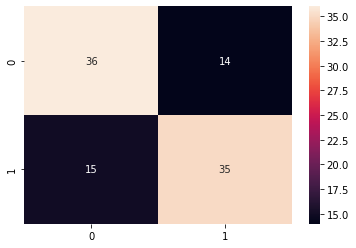

In [22]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [23]:
print(classification_report(y01, yhat))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71        50
           1       0.71      0.70      0.71        50

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



## Regiones de clasificación

In [24]:
# Plotting decision regions
h = 0.01
x_min, x_max = X12[:,0].min() - 1, X12[:,0].max() + 1
y_min, y_max = X12[:,1].min() - 1, X12[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

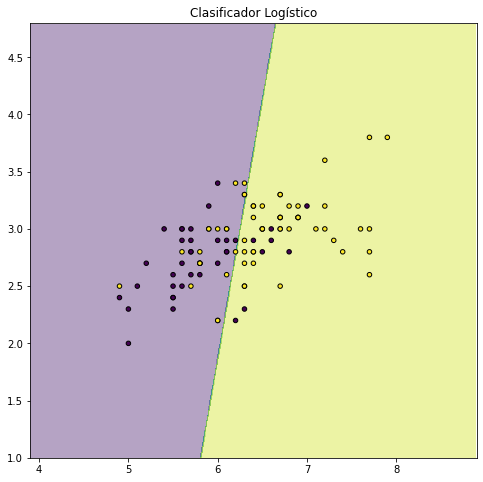

In [25]:
plt.figure(figsize=(8,8))
Zp, Z = predict(np.c_[xx.ravel(), yy.ravel()], w)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X12[:,0], X12[:,1], c=y01, s=20, edgecolor='k')
plt.title('Clasificador Logístico')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

## Sklearn

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
#penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
#max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
#l1_ratio=None)[source]

In [28]:
model.fit(X01[:,[0,1]], y01)

LogisticRegression()

In [29]:
model.coef_

array([[ 3.14745566, -2.22454385]])

In [30]:
ypred = model.predict(X01[:,[0,1]])
print(ypred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:
cfmatrix = confusion_matrix(y01, ypred)
print(cfmatrix)

[[50  0]
 [ 1 49]]


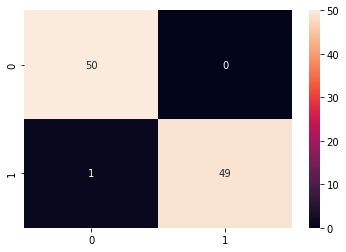

In [32]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [33]:
print(classification_report(y01, ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## Regiones de clasificación

In [34]:
# Plotting decision regions
h = 0.01
x_min, x_max = X01[:,0].min() - 1, X01[:,0].max() + 1
y_min, y_max = X01[:,1].min() - 1, X01[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

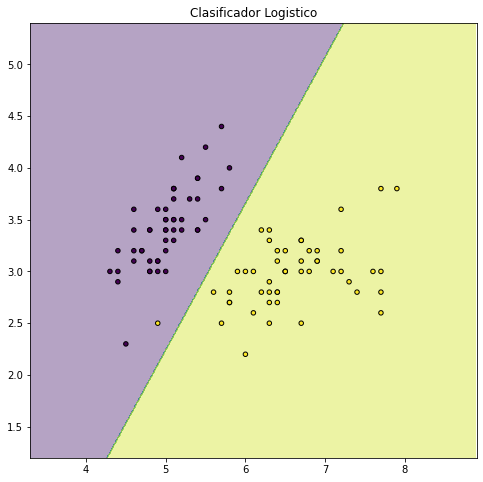

In [35]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X01[:,0], X01[:,1], c=y01, s=20, edgecolor='k')
plt.title('Clasificador Logistico')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

In [36]:
model2 = LogisticRegression()

In [37]:
model2.fit(X12[:,[0,1]], y01)

LogisticRegression()

In [38]:
model2.coef_

array([[1.5890194 , 0.40894657]])

In [39]:
ypred2 = model2.predict(X12[:,[0,1]])
print(ypred2)

[1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0]


In [40]:
cfmatrix2 = confusion_matrix(y01, ypred2)
print(cfmatrix2)

[[38 12]
 [13 37]]


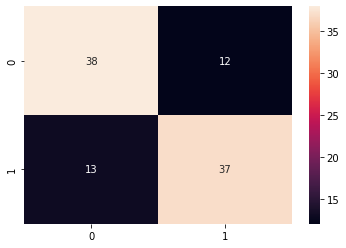

In [41]:
plt.figure()
sns.heatmap(cfmatrix2, annot=True)
plt.show()

In [42]:
print(classification_report(y01, ypred2))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        50
           1       0.76      0.74      0.75        50

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



## Regiones de clasificación

In [43]:
# Plotting decision regions
h = 0.01
x_min, x_max = X12[:,0].min() - 1, X12[:,0].max() + 1
y_min, y_max = X12[:,1].min() - 1, X12[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

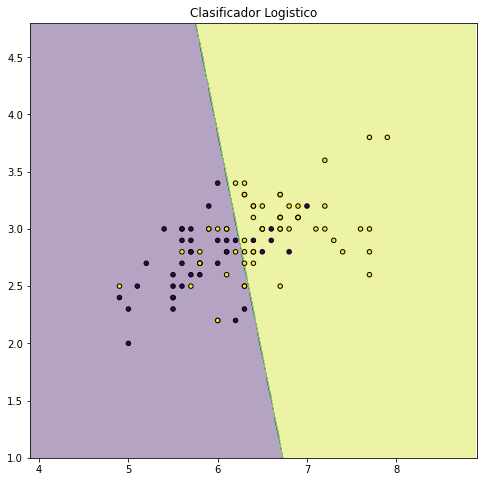

In [44]:
plt.figure(figsize=(8,8))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X12[:,0], X12[:,1], c=y01, s=20, edgecolor='k')
plt.title('Clasificador Logistico')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

## MNIST

In [45]:
from tensorflow.keras.datasets import mnist

In [46]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

In [47]:
print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [48]:
np.random.seed(2022)
idx = np.random.permutation(1000)[:100]

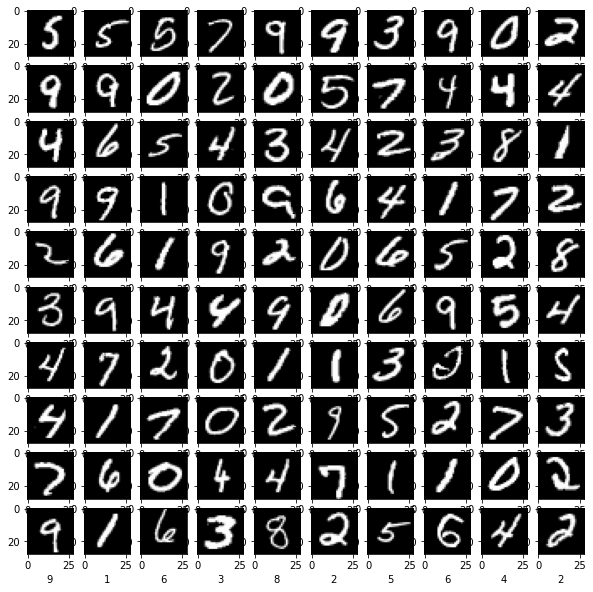

In [49]:
plt.figure(figsize=(10,10))
for i in range(0,10):
    for j in range(0,10):
        plt.subplot(10, 10, 10*i+j+1)
        plt.imshow(Xtrain[idx[10*i+j]], cmap='gray')
        plt.xlabel(Ytrain[idx[10*i+j]])
plt.show()

In [74]:
# clases
a = 3
b = 8

In [75]:
# select only 0 and 1 images
XtrainAB = Xtrain[(Ytrain==a) | (Ytrain==b)]
XtestAB  = Xtest[(Ytest==a) | (Ytest==b)]

YtrainAB = Ytrain[(Ytrain==a) | (Ytrain==b)]
YtestAB  = Ytest[(Ytest==a) | (Ytest==b)]

In [76]:
print(XtrainAB.shape, YtrainAB.shape)
print(XtestAB.shape, YtestAB.shape)

(11982, 28, 28) (11982,)
(1984, 28, 28) (1984,)


IndexError: index 1 is out of bounds for axis 0 with size 1

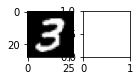

In [77]:
plt.figure(figsize=(10,10))
for i in range(0,10):
    for j in range(0,10):
        plt.subplot(10, 10, 10*i+j+1)
        plt.imshow(XtrainAB[idx[10*i+j]], cmap='gray')
plt.show()

### Regresión logística para clasificar dos clases

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

In [80]:
model.fit(XtrainAB.reshape(-1,784), YtrainAB)

C:\Users\61292\Anaconda3\envs\tf2.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
model.coef_.shape

(1, 784)

In [82]:
ypred = model.predict(XtestAB.reshape(-1,784))
print(ypred)

[3 3 3 ... 8 8 3]


In [83]:
cfmatrix = confusion_matrix(YtestAB, ypred)
print(cfmatrix)

[[979  31]
 [ 39 935]]


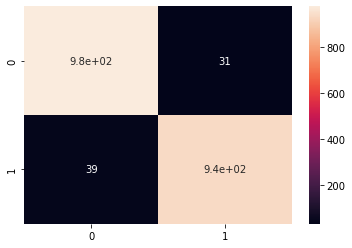

In [84]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [85]:
print(classification_report(YtestAB, ypred))

              precision    recall  f1-score   support

           3       0.96      0.97      0.97      1010
           8       0.97      0.96      0.96       974

    accuracy                           0.96      1984
   macro avg       0.96      0.96      0.96      1984
weighted avg       0.96      0.96      0.96      1984



## Regiones de clasificación

In [86]:
# Ejemplos de As bien clasificados
buenosA = XtestAB[(YtestAB == a) & (ypred == a)]
idx = np.random.permutation(buenosA.shape[0])
buenosA = buenosA[idx]

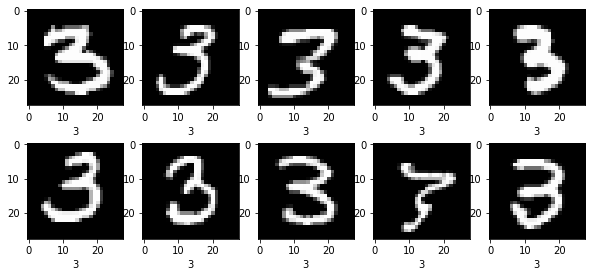

In [87]:
plt.figure(figsize=(10,4.5))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.imshow(buenosA[i], cmap='gray')
    plt.xlabel(str(a))
plt.show()

In [88]:
## Ejemplos de 1s bien clasificados
buenosB = XtestAB[(YtestAB == b) & (ypred == b)]
idx = np.random.permutation(buenosB.shape[0])
buenosB = buenosB[idx]

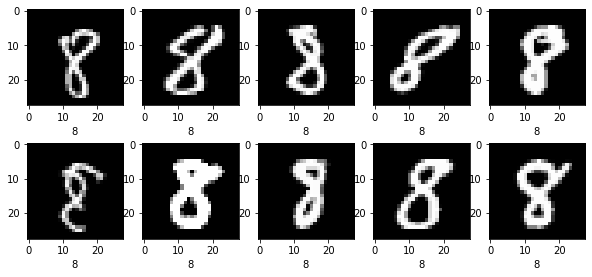

In [89]:
plt.figure(figsize=(10,4.5))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.imshow(buenosB[i], cmap='gray')
    plt.xlabel(str(b))
plt.show()

In [93]:
# Ejemplos de mal clasificados
malosA = XtestAB[(YtestAB == a) & (ypred == b)]
malosB = XtestAB[(YtestAB == b) & (ypred == a)]
idx = np.random.permutation(malosA.shape[0])
jdx = np.random.permutation(malosB.shape[0])
malosA = malosA[idx]
malosB = malosB[jdx]

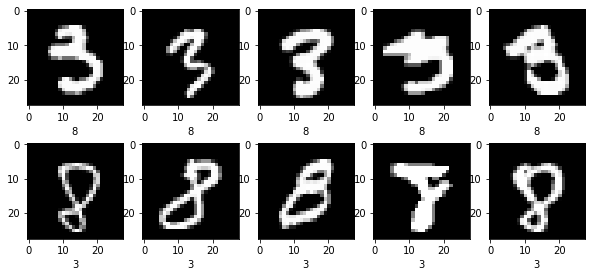

In [94]:
plt.figure(figsize=(10,4.5))
for i in range(0, 5):
    plt.subplot(2,5,i+1)
    plt.imshow(malosA[i], cmap='gray')
    plt.xlabel(str(b))
for i in range(0, 5):
    plt.subplot(2,5,5+i+1)
    plt.imshow(malosB[i], cmap='gray')
    plt.xlabel(str(a))
plt.show()